In [22]:
import pandas as pd

In [23]:
df = pd.read_csv("/home/michelle/Documents/DEV_IA/Projet/Brief_machine_learning_Vlille_210322/data/train.csv")

In [24]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [25]:
df = df.drop(columns=["casual", "registered"])

# 2/ Utilisation de pycaret afin de trouver la meilleure metrique

### Affiche un tableau contenant les fonctionnalités et leurs types de données après l'exécution de la fonction setup

In [26]:
from pycaret.regression import *

s = setup( df, target = 'count', session_id=123)

#silent = True permet de plus avoir a valider 

,Description,Value
0,session_id,123
1,Target,count
2,Original Data,"(10886, 10)"
3,Missing Values,0
4,Numeric Features,4
5,Categorical Features,4
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(7620, 58)"


### Comparaison de tous les models à l'aide de la validation croisée k-fold pour l'évaluation des métriques

In [27]:
# compare all models
best = compare_models(sort = 'RMSLE') 

# se base sur le r2, peut etre modifié par compare_models(sort = 'RMSLE')
# par defaut :fold=10

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,48.9984,5795.3738,76.0795,0.8237,0.4514,0.4783,0.9320
rf,Random Forest Regressor,50.6064,5731.6501,75.6422,0.8254,0.5227,0.6523,0.8790
lightgbm,Light Gradient Boosting Machine,48.8305,4883.2436,69.8108,0.8514,0.5953,0.7903,0.0590
dt,Decision Tree Regressor,65.7087,10813.7904,103.9058,0.6707,0.6490,0.7312,0.0360
gbr,Gradient Boosting Regressor,66.4058,8691.1245,93.1458,0.7358,0.7920,1.3574,0.2260
huber,Huber Regressor,79.0435,12802.9513,113.0703,0.6110,0.9570,2.2619,0.1890
lr,Linear Regression,79.1067,11888.2177,108.9520,0.6386,0.9928,2.4576,0.3520
ridge,Ridge Regression,79.1088,11887.8378,108.9504,0.6386,0.9937,2.4542,0.0210
br,Bayesian Ridge,79.1119,11887.8977,108.9507,0.6386,0.9940,2.4520,0.0340
lasso,Lasso Regression,81.4382,12535.6876,111.8818,0.6190,1.0088,2.3777,0.0200


 ### Affiche la bibliothèque de modèles de PyCaret

In [28]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


Pas capté

In [29]:
# check the final params of best model
best.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

### Dataviz de best 

In [30]:
# check the residuals of trained model
plot_model(best, plot = 'residuals_interactive')

    'data': [{'hovertemplate': 'Split=train<br>Predictions…

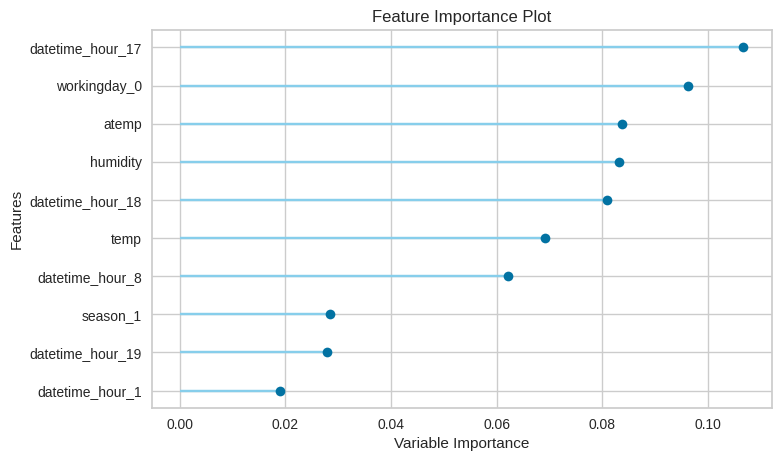

In [31]:
plot_model(best, plot = 'feature')

In [32]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [33]:
## Prediction sur des données invisible

In [34]:
# copy data and remove target variable
data_unseen = df.copy()
data_unseen.drop('count', axis = 1, inplace = True)
predictions = predict_model(best, data_unseen)

predictions.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Label
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,30.46
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.55
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,6.28


### Création d'un modèle de regression lineaire

In [35]:
lr = create_model('lr')

In [36]:
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


### Ajustement des hyperparamètres

In [37]:
# Ajustement des hyperparamètres
tuned_lr = tune_model(lr)

In [38]:
print(tuned_lr)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True)


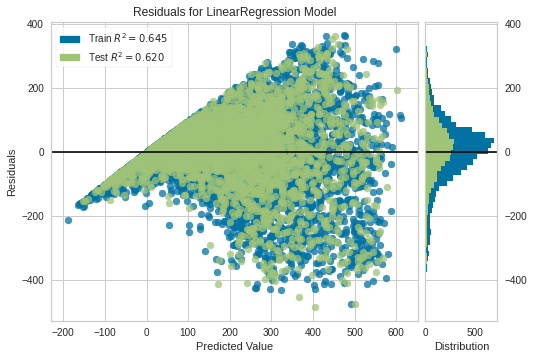

In [39]:
#Residual Plot
plot_model(tuned_lr)

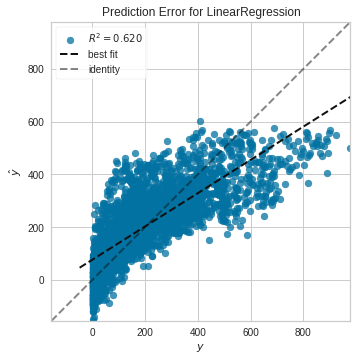

In [40]:
#Prediction Error Plot
plot_model(tuned_lr, plot = 'error')

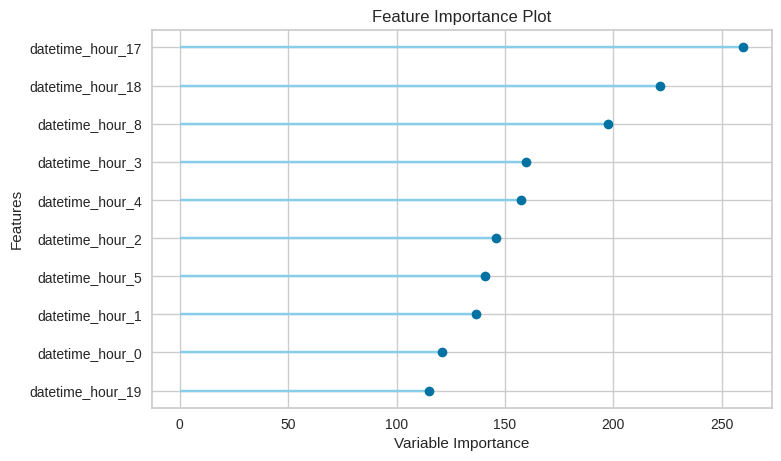

In [41]:
plot_model(tuned_lr, plot='feature')

In [42]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [43]:
predict_model(tuned_lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,80.6099,12336.2594,111.0687,0.6203,0.9836,2.4568


,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,holiday_0,workingday_0,...,datetime_hour_23,datetime_hour_3,datetime_hour_4,datetime_hour_5,datetime_hour_6,datetime_hour_7,datetime_hour_8,datetime_hour_9,count,Label
0,18.040001,21.969999,62.0,16.997900,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,188,147.487549
1,13.120000,15.150000,61.0,16.997900,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,-16.840485
2,12.300000,14.395000,52.0,16.997900,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89,101.035583
3,18.860001,22.725000,88.0,8.998100,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,96.358765
4,33.619999,37.119999,43.0,19.999500,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150,301.404694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,22.139999,25.760000,83.0,26.002701,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67,177.683258
3262,18.860001,22.725000,88.0,19.999500,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,-16.335388
3263,26.240000,30.305000,65.0,16.997900,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,647,281.889160
3264,13.120000,16.665001,76.0,6.003200,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,102.920067


In [44]:
lr_holdout_pred = predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,80.6106,12336.3311,111.0690,0.6203,0.9835,2.4569


In [45]:
final_lr = finalize_model(tuned_lr)
final_lr

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True)

In [46]:
predict_model(final_lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,79.9824,12201.8004,110.4618,0.6244,0.9788,2.4630


,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,holiday_0,workingday_0,...,datetime_hour_23,datetime_hour_3,datetime_hour_4,datetime_hour_5,datetime_hour_6,datetime_hour_7,datetime_hour_8,datetime_hour_9,count,Label
0,18.040001,21.969999,62.0,16.997900,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,188,144.762802
1,13.120000,15.150000,61.0,16.997900,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,-12.150223
2,12.300000,14.395000,52.0,16.997900,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89,95.133644
3,18.860001,22.725000,88.0,8.998100,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,95.341637
4,33.619999,37.119999,43.0,19.999500,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150,297.143311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,22.139999,25.760000,83.0,26.002701,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67,172.116028
3262,18.860001,22.725000,88.0,19.999500,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,-20.655415
3263,26.240000,30.305000,65.0,16.997900,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,647,289.012939
3264,13.120000,16.665001,76.0,6.003200,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,93.184502


### Création d'un model Random Forest

In [47]:
rf = create_model('rf')

In [48]:
tuned_rf = tune_model(rf)

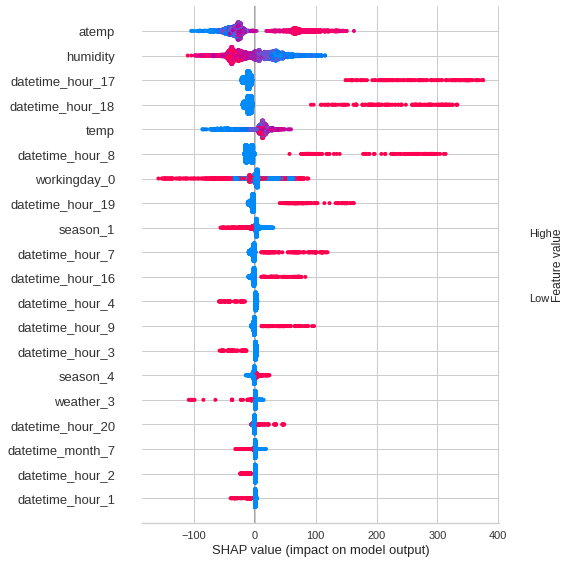

In [49]:
import shap

interpret_model(tuned_rf)

In [50]:
rf_holdout_pred = predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,49.3836,5364.9307,73.2457,0.8349,0.5095,0.6363


### Création d'un model Dummy

In [51]:
dummy = create_model('dummy')

## Prediction sur des données invisible (unseen data)

In [52]:
unseen_predictions = predict_model(final_lr, data_unseen) 
unseen_predictions.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Label
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,-45.288929
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,-65.484108
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,-75.225258
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,-74.309479
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,-73.917892


pas capté

In [53]:
from pycaret.utils import check_metric

check_metric(unseen_predictions.count, unseen_predictions.Label, 'R2')

ValueError: y should be a 1d array, got an array of shape () instead.

In [ ]:
#save_model(final_lr,'Final LinearRegression Model 22Mars2022')

## 3/ Division de ‘train’ ⇒ 
- Entrainement : 01/2011 à 08/2012 
- Test : 09/2012 à 12/2012

In [ ]:
#Split a dataframe based on a date in a datetime column
df_train = df.loc[df['datetime'] <= '2012-08-19 23:00:00']
df_test = df.loc[df['datetime'] >= '2012-09']

In [ ]:
from sklearn.model_selection import train_test_split
X = df_train.drop(columns=['count', 'casual', 'registered'])
y = df_train['count']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 3)


In [ ]:
#semble inutile
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(df.index)
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))